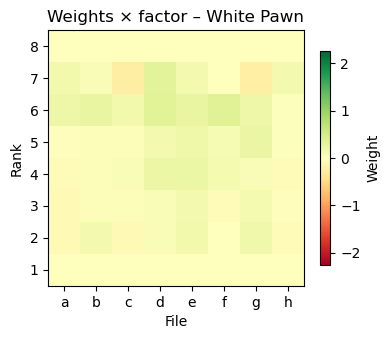

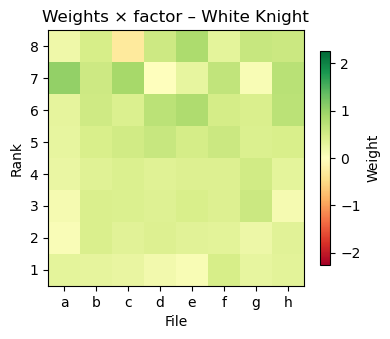

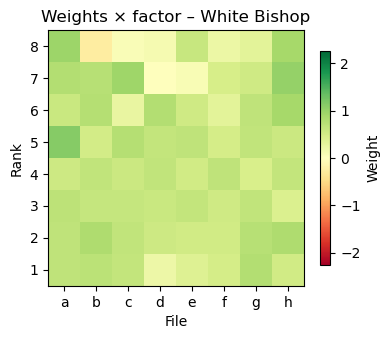

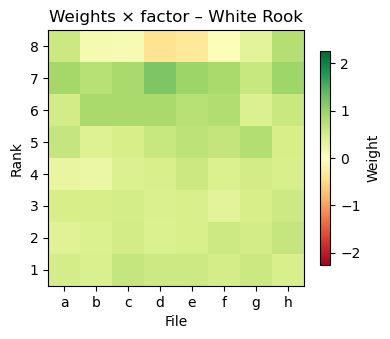

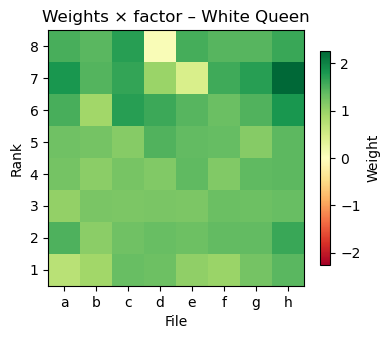

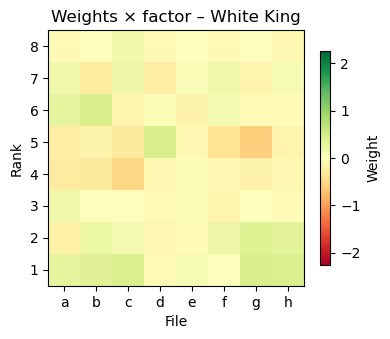

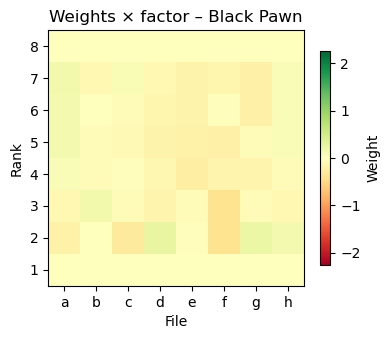

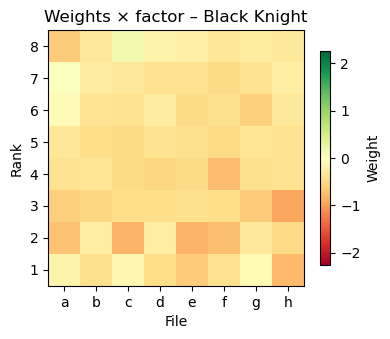

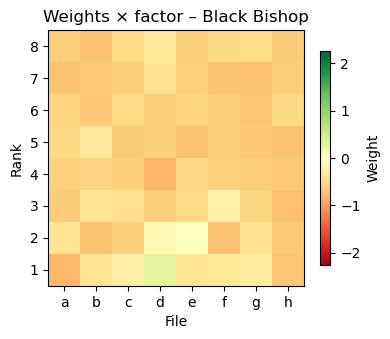

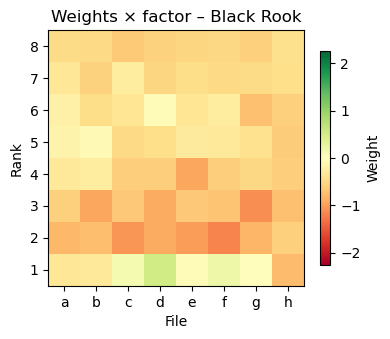

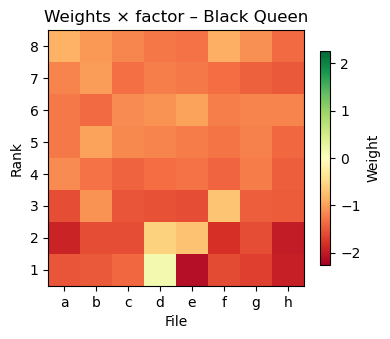

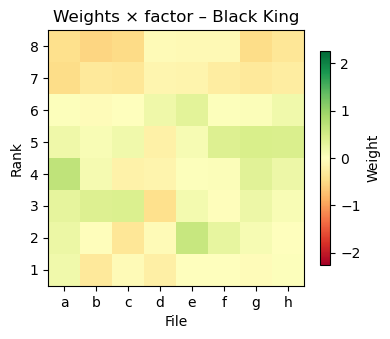

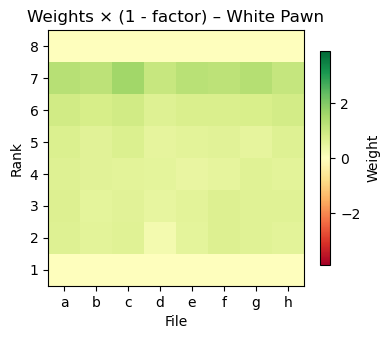

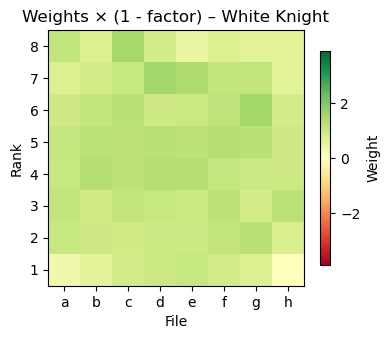

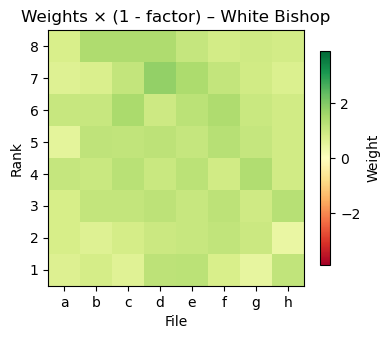

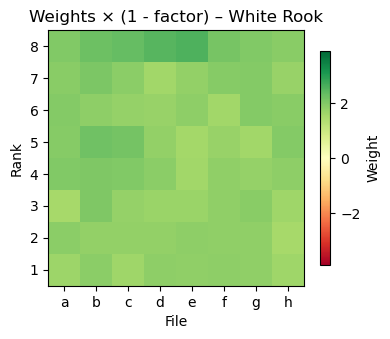

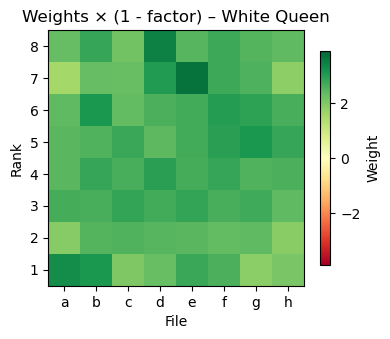

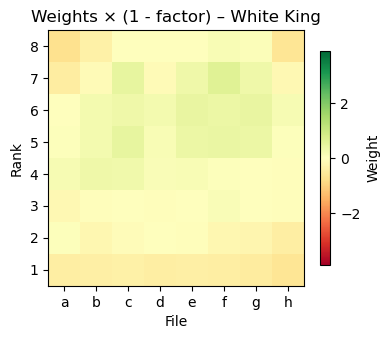

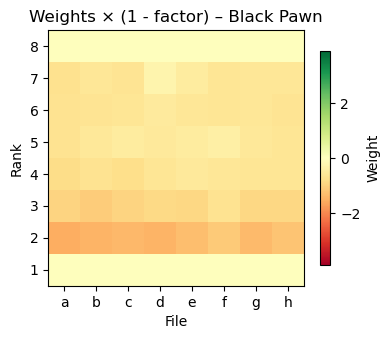

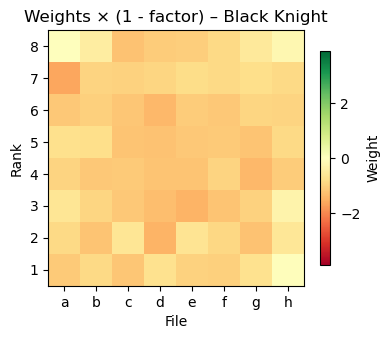

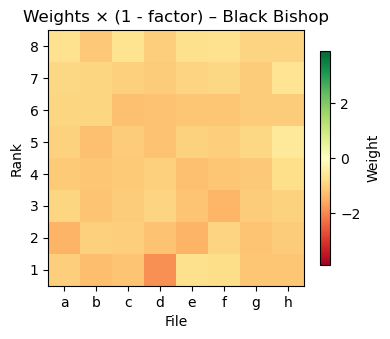

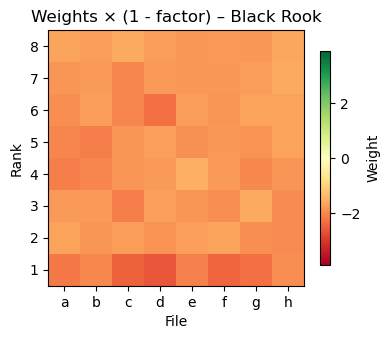

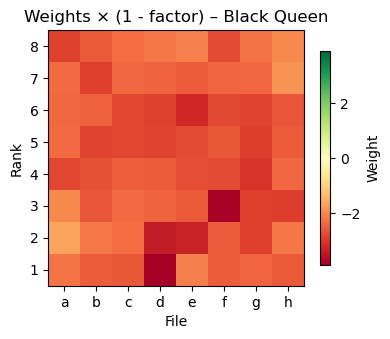

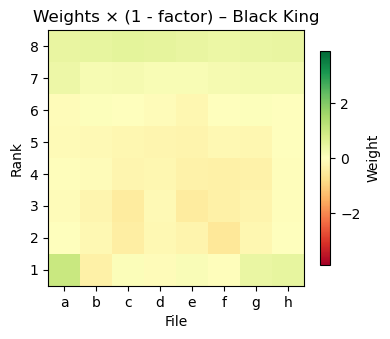

Castling-rights weights for:

  ● Weights × factor:
    White kingside  :  0.2208
    White queenside :  0.0381
    Black kingside  : -0.3024
    Black queenside : -0.0646

  ● Weights × (1 - factor):
    White kingside  : -0.1320
    White queenside : -0.1590
    Black kingside  :  0.2779
    Black queenside : -0.2069


In [8]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from sklearn.linear_model import LogisticRegression

# ─── 1. Load your trained LogisticRegression ───────────────────────────────────
model: LogisticRegression = joblib.load('chess_lr.joblib')

# Here coef_[2] - coef_[0] yields a single (1544,) vector; adjust if your index usage differs.
coef_flat = model.coef_[2] - model.coef_[0]   # shape == (1544,) if n_features == 2 * 772

# ─── 2. Sanity‐check dimensions ─────────────────────────────────────────────────
n_total = coef_flat.shape[0]
if n_total != 1544:
    raise ValueError(f"Expected 1544 weights, but found {n_total}")

# ─── 3. Split into the two “half” blocks of length 772 ───────────────────────────
w_factor    = coef_flat[:772]        # weights corresponding to features * factor
w_invfactor = coef_flat[772:772+772] # weights corresponding to features * (1 - factor)

# ─── 4. Separate out the piece‐square weights (first 768 entries of each) ───────
# Reshape each half into (12, 8, 8) directly, so we can plot them separately.
boards_factor    = w_factor[:768].reshape(12, 64).reshape(12, 8, 8)
boards_invfactor = w_invfactor[:768].reshape(12, 64).reshape(12, 8, 8)

# ─── 5. Extract castling‐rights weights from each half (next 4 entries) ────────
castle_factor    = w_factor[768:768+4]
castle_invfactor = w_invfactor[768:768+4]

# ─── 6. Plotting utility ─────────────────────────────────────────────────────────
piece_names = [
    'White Pawn', 'White Knight', 'White Bishop', 'White Rook',
    'White Queen', 'White King',
    'Black Pawn', 'Black Knight', 'Black Bishop', 'Black Rook',
    'Black Queen', 'Black King'
]
files = list('abcdefgh')
ranks = list('12345678')

def plot_boards(boards, title_prefix):
    """
    Plot a list of 12 (8×8) boards using a diverging colormap.
    `boards` should be a NumPy array of shape (12, 8, 8).
    `title_prefix` is a string to prepend to each subplot’s title.
    """
    max_abs = np.max(np.abs(boards))
    norm = TwoSlopeNorm(vmin=-max_abs, vcenter=0.0, vmax=max_abs)

    for idx, name in enumerate(piece_names):
        board = boards[idx]

        fig, ax = plt.subplots(figsize=(4, 4))
        im = ax.imshow(board, cmap='RdYlGn', norm=norm, origin='lower')
        ax.set_xticks(range(8))
        ax.set_xticklabels(files)
        ax.set_yticks(range(8))
        ax.set_yticklabels(ranks)
        ax.set_xlabel('File')
        ax.set_ylabel('Rank')
        ax.set_title(f"{title_prefix} – {name}")
        fig.colorbar(im, ax=ax, shrink=0.6, orientation='vertical', label='Weight')
        plt.tight_layout()
        plt.show()


# ─── 7. Plot “factor” half ───────────────────────────────────────────────────────
plot_boards(boards_factor, title_prefix="Weights × factor")

# ─── 8. Plot “invfactor” half ───────────────────────────────────────────────────
plot_boards(boards_invfactor, title_prefix="Weights × (1 - factor)")

# ─── 9. Print out castling‐rights weights for each half ──────────────────────────
print("Castling-rights weights for:")
print("\n  ● Weights × factor:")
print(f"    White kingside  : {castle_factor[0]: .4f}")
print(f"    White queenside : {castle_factor[1]: .4f}")
print(f"    Black kingside  : {castle_factor[2]: .4f}")
print(f"    Black queenside : {castle_factor[3]: .4f}")

print("\n  ● Weights × (1 - factor):")
print(f"    White kingside  : {castle_invfactor[0]: .4f}")
print(f"    White queenside : {castle_invfactor[1]: .4f}")
print(f"    Black kingside  : {castle_invfactor[2]: .4f}")
print(f"    Black queenside : {castle_invfactor[3]: .4f}")
